In [1]:
import pandas as pd
import numpy as np


from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-MiniLM-L6-v2')

#df=pd.read_csv('data/All_Sentences.csv',delimiter=',')



/Users/davsu428/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
for i in range(1):
    df=pd.read_csv('data/Episode_%d.csv'% i,delimiter=',')
    df['Embedding'] = df.apply(lambda row: model.encode(df['Said']), axis=1)
    print(df)

    said=list(df['Said'])
    embeddings = model.encode(said, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

    # Want to store all the embedding numbers.
    df['Embedding'] = embeddings

    # How can we save these files so that we can have character, sentence and embedding in one
    # easy to access dataframe.
    df.to_json('data/Episode_%d_E.json'% i)

In [9]:
# Shows why doesn't work!
print(embeddings)
print(df['Embedding'])

tensor([[ 0.0093, -0.0321,  0.0147,  ...,  0.0473,  0.0352, -0.0449],
        [ 0.0315, -0.0333,  0.0769,  ..., -0.1059,  0.0358,  0.0432],
        [ 0.0198,  0.0752, -0.0206,  ..., -0.0573,  0.0391, -0.0380],
        ...,
        [-0.0471,  0.0617,  0.0090,  ..., -0.0332,  0.0297,  0.0762],
        [-0.0116, -0.0244,  0.0355,  ...,  0.0071,  0.0712,  0.0227],
        [-0.0351,  0.0021, -0.0148,  ..., -0.0397,  0.0162,  0.0337]])
0      0.009307
1      0.031476
2      0.019815
3      0.007692
4     -0.040985
         ...   
377    0.017474
378   -0.031457
379   -0.047143
380   -0.011585
381   -0.035102
Name: Embedding, Length: 382, dtype: float32


["We're goin...", 'Okay, it w...', 'Hey!', 'Hey!', "What-what'...", "We're gonn...", 'Everest!', 'Yeah baby!', 'Really?!', 'I looked i...']


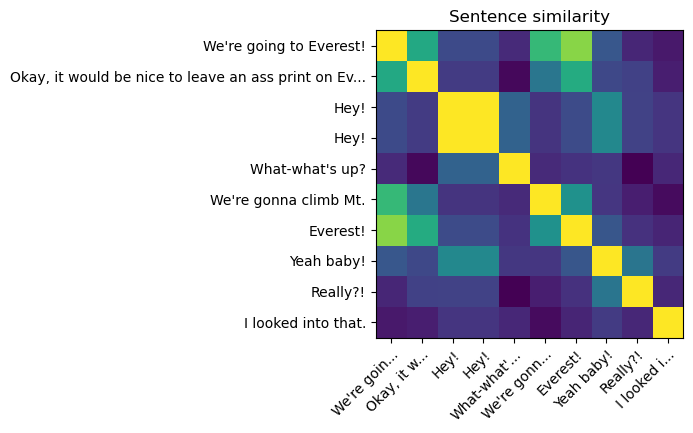

In [11]:
import pandas as pd
import numpy as np
import matplotlib

from sentence_transformers import SentenceTransformer,util

import matplotlib as mpl
import matplotlib.pyplot as plt
#Compute cosine similarity between all pairs
cos_sim = util.cos_sim(embeddings, embeddings)


display_start=20
display_end=30

cos_sim_10 =cos_sim[display_start:display_end,display_start:display_end]

fig, ax = plt.subplots()
im = ax.imshow(cos_sim_10)

def shorten(item,n):
    if len(item)>n+3:
        return item[0:n] + '...' 
    else:
        return item

said_short=[]
for item in said[display_start:display_end]:
    said_short.append(shorten(item,10))
said_medium=[]
for item in said[display_start:display_end]:
    said_medium.append(shorten(item,50))

print(said_short)
    
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(said_short)), labels=said_short)
ax.set_yticks(np.arange(len(said_medium)), labels=said_medium)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Sentence similarity")
fig.tight_layout()
plt.show()

In [17]:
df.to_pickle('data/Episode_%d_E.pkl'% i)
pickle.dump( df, open( "data/Episode_%d.p"% i, "wb" ) )

In [18]:
import pickle
#pickle.load('data/Episode_0_E.pkl')

pickle.load( open( "data/Episode_%d.p"% i, "rb" ) )

ValueError: Wrong number of items passed 384, placement implies 1

In [119]:
"""
This is a more complex example on performing clustering on large scale dataset.
This examples find in a large set of sentences local communities, i.e., groups of sentences that are highly
similar. You can freely configure the threshold what is considered as similar. A high threshold will
only find extremely similar sentences, a lower threshold will find more sentence that are less similar.
A second parameter is 'min_community_size': Only communities with at least a certain number of sentences will be returned.
The method for finding the communities is extremely fast, for clustering 50k sentences it requires only 5 seconds (plus embedding comuptation).
In this example, we download a large set of questions from Quora and then find similar questions in this set.
"""
from sentence_transformers import SentenceTransformer, util

character = list(df['Person'])
corpus_sentences = said
corpus_embeddings =  embeddings



#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 25 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(corpus_embeddings, min_community_size=20, threshold=0.04)
print(len(clusters))
#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("%s : %s" % (character[sentence_id],corpus_sentences[sentence_id]))
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("%s : %s"% (character[sentence_id],corpus_sentences[sentence_id]))


1

Cluster 1, #389 Elements 
Ross : Hey everybody!
Ross : Happy Thanksgiving!
Chandler : No, no, no.
	 ...
Ross : I know.
Chandler : Yeah.
Chandler : End


In [95]:
embeddings

array([[-0.06292001,  0.02220031,  0.07742068, ...,  0.04880926,
         0.0736526 ,  0.01871135],
       [ 0.00682118, -0.04483594,  0.0537557 , ...,  0.11062304,
         0.07228915,  0.05540337],
       [-0.01032703,  0.04325484, -0.00132912, ..., -0.05859902,
         0.04964947, -0.02987811],
       ...,
       [ 0.01981522,  0.07520658, -0.02055376, ..., -0.0572909 ,
         0.03910507, -0.0380261 ],
       [-0.14641151,  0.00565292, -0.00910747, ...,  0.03091162,
         0.09168582, -0.03410269],
       [-0.03510161,  0.00205916, -0.01478848, ..., -0.03965149,
         0.01622299,  0.03367841]], dtype=float32)